In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('heart_failure_clinical_records.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [4]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
4995,45.0,0,582,1,55,0,543000.0,1.0,132,0,0,250,0
4996,60.0,1,582,0,30,1,127000.0,0.9,145,0,0,95,0
4997,95.0,1,112,0,40,1,196000.0,1.0,138,0,0,24,1
4998,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
4999,40.0,0,244,0,45,1,275000.0,0.9,140,0,0,174,0


In [5]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [7]:
df.duplicated().sum()

3680

In [8]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [15]:
df.shape

(5000, 13)

In [10]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [11]:
df['age'] = df['age'].astype(int)

In [12]:
df.dtypes

age                           int32
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   int32  
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(2), int32(1), int64(10)
memory usage: 488.4 KB


## Correlation Matrix

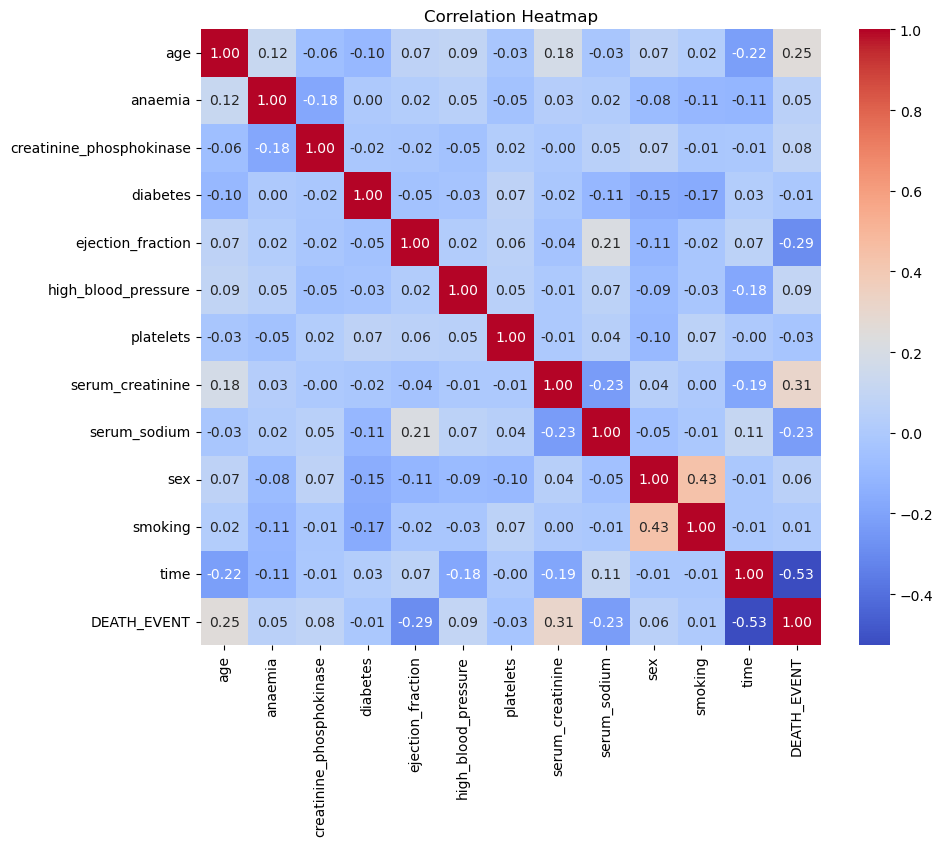

In [17]:
def correlation_heatmap(data):
    corr_matrix = data.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
    plt.title('Correlation Heatmap')
    plt.show()

correlation_heatmap(df)

## Numerical columns

In [18]:
numerical_columns = df.select_dtypes(include=['number']).columns

In [19]:
numerical_columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

## Density Plot to check the skewness of the columns

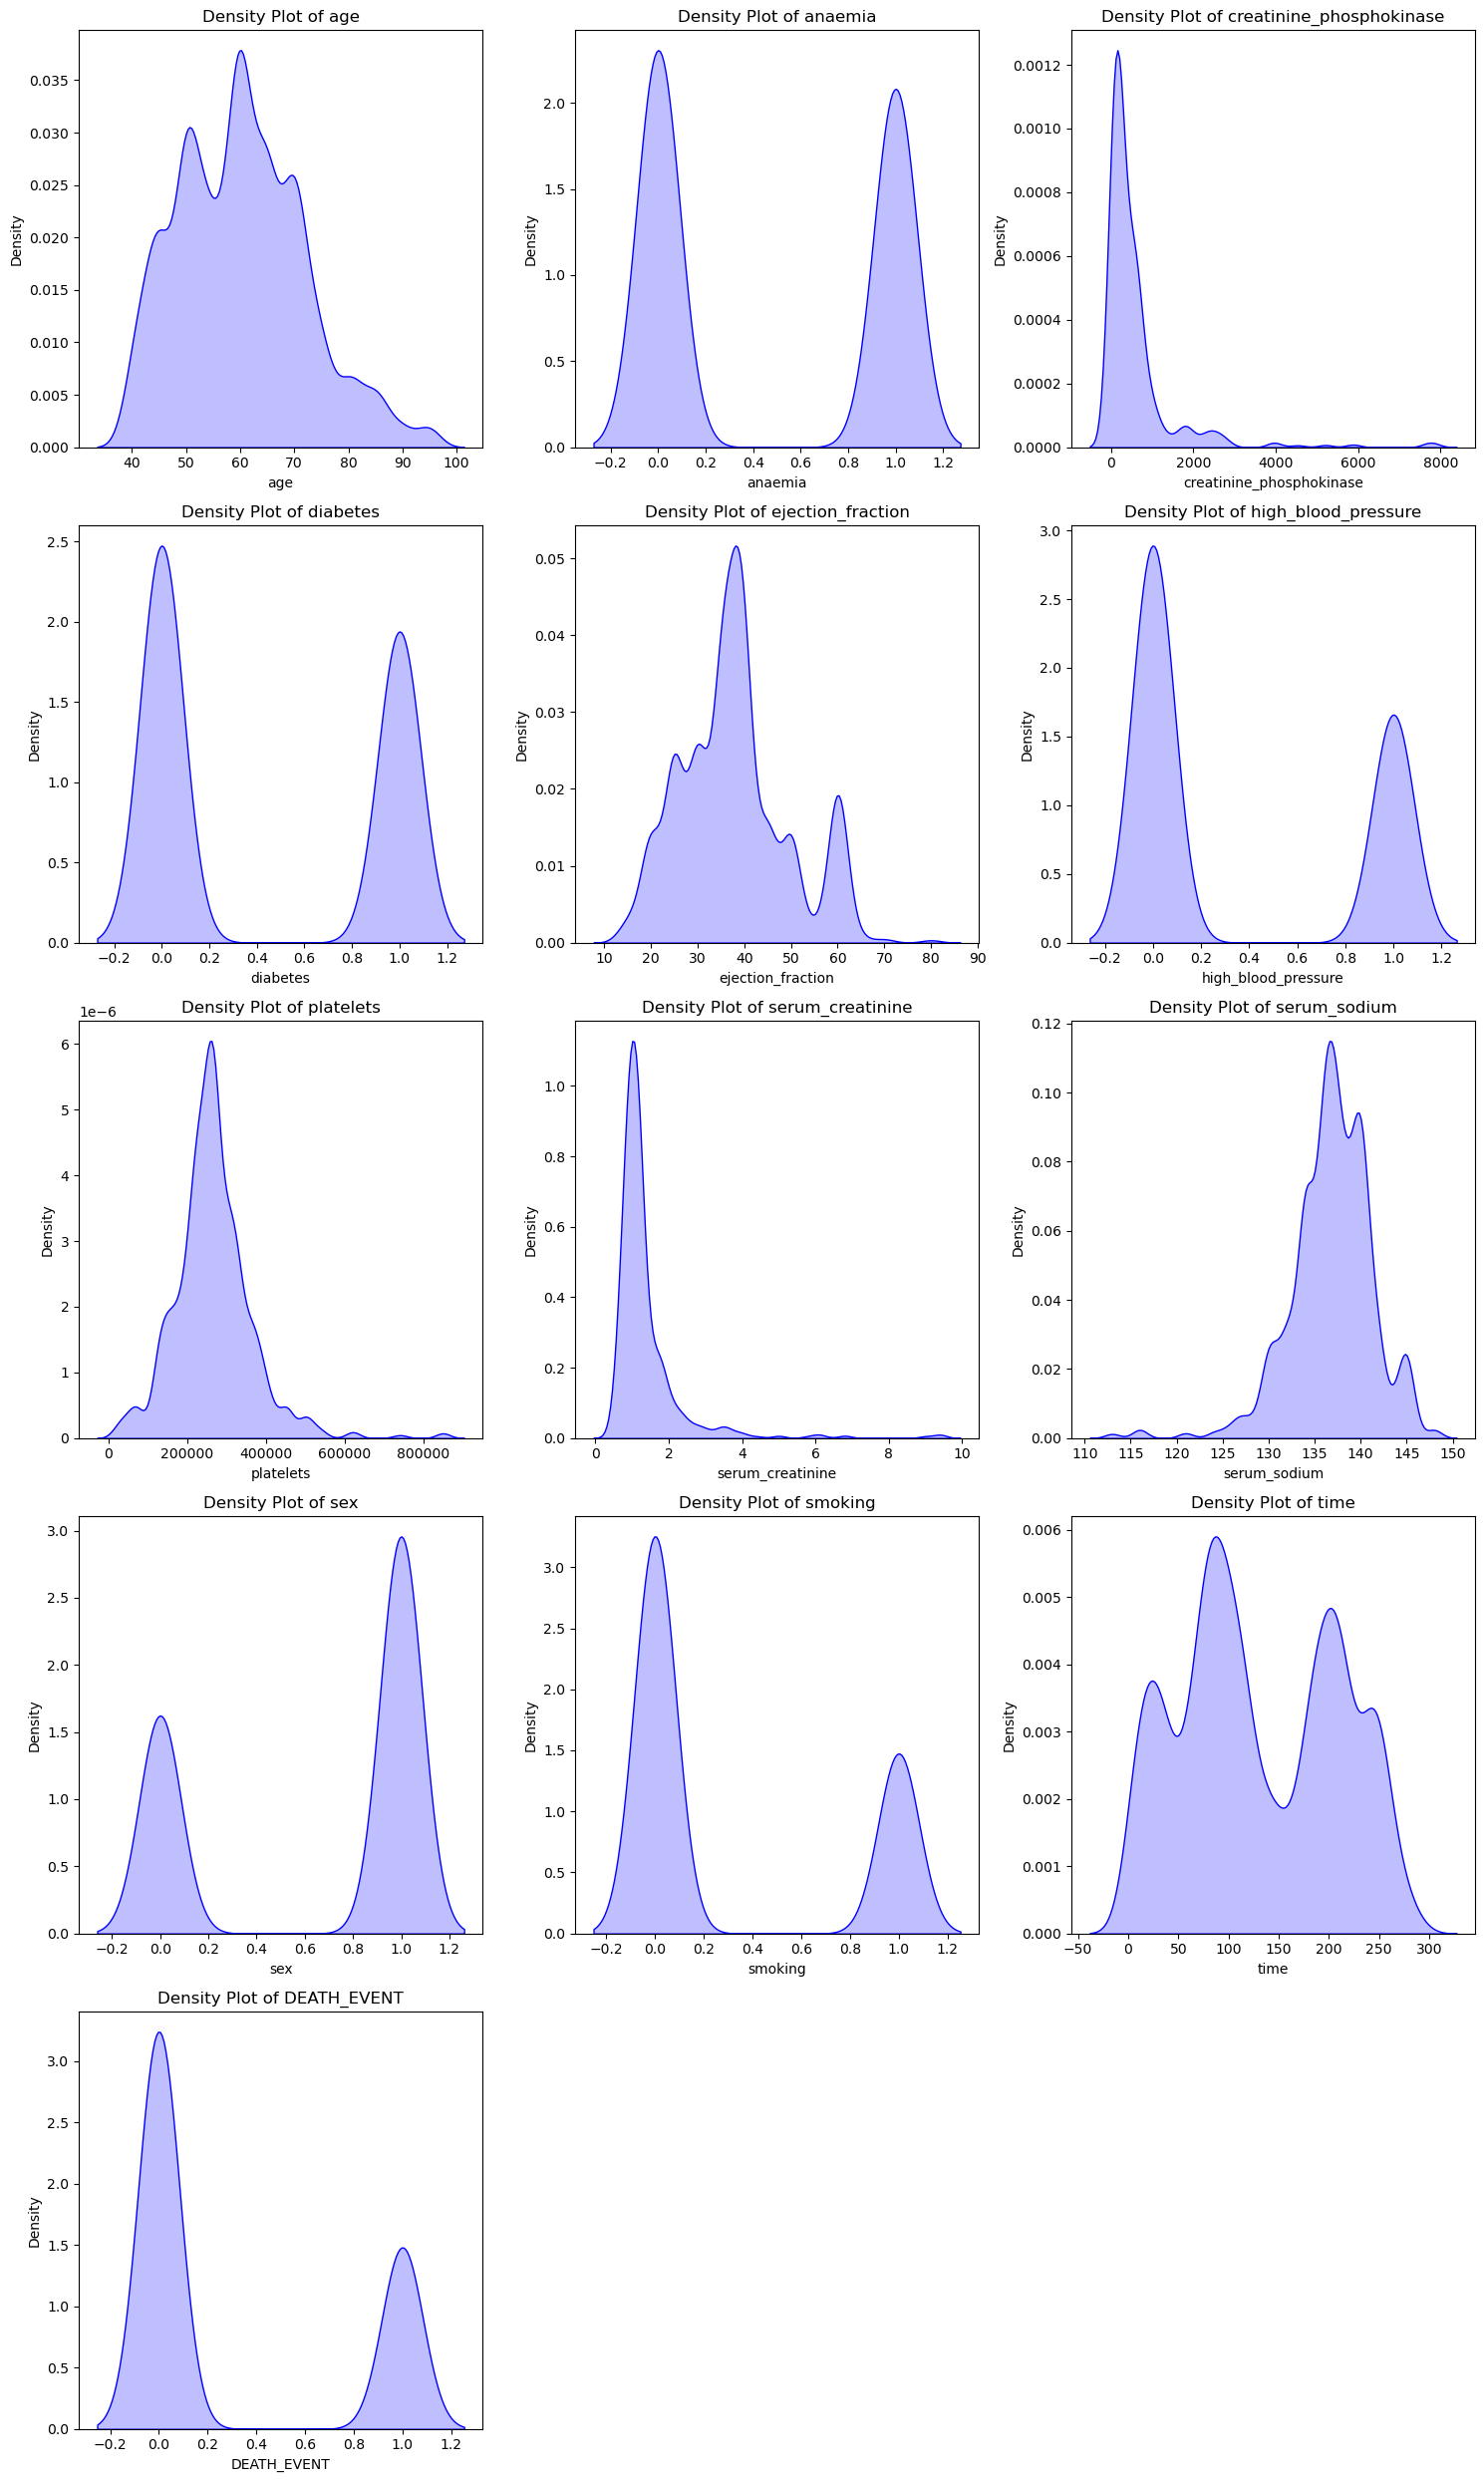

In [27]:
num_columns = len(numerical_columns)
rows = (num_columns // 3) + (1 if num_columns % 3 != 0 else 0)

plt.figure(figsize=(15, 5 * rows))

for i, col in enumerate(numerical_columns, start=1):
    plt.subplot(rows, 3, i)  
    sns.kdeplot(df[col].dropna(), color='blue', fill=True)
    plt.title(f'Density Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


In [32]:
skewness = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT']].skew()

print(f"Skewness'of the all numerical columns: {skewness}")

Skewness'of the all numerical columns: age                         0.452389
anaemia                     0.102565
creatinine_phosphokinase    4.403444
diabetes                    0.244274
ejection_fraction           0.494405
high_blood_pressure         0.561894
platelets                   1.157117
serum_creatinine            4.615903
serum_sodium               -0.997975
sex                        -0.608966
smoking                     0.812802
time                        0.114989
DEATH_EVENT                 0.803766
dtype: float64


## After Logrithmic Transformation 

In [33]:
df[['creatinine_phosphokinase','platelets',
       'serum_creatinine']] = np.log(df[['creatinine_phosphokinase','platelets',
       'serum_creatinine']] + 1)

In [35]:
skewness = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT']].skew()

print(f"Skewness'of the all numerical columns: {skewness}")

Skewness'of the all numerical columns: age                         0.452389
anaemia                     0.102565
creatinine_phosphokinase    0.468208
diabetes                    0.244274
ejection_fraction           0.494405
high_blood_pressure         0.561894
platelets                  -1.621996
serum_creatinine            2.377956
serum_sodium               -0.997975
sex                        -0.608966
smoking                     0.812802
time                        0.114989
DEATH_EVENT                 0.803766
dtype: float64


## Box Plots 

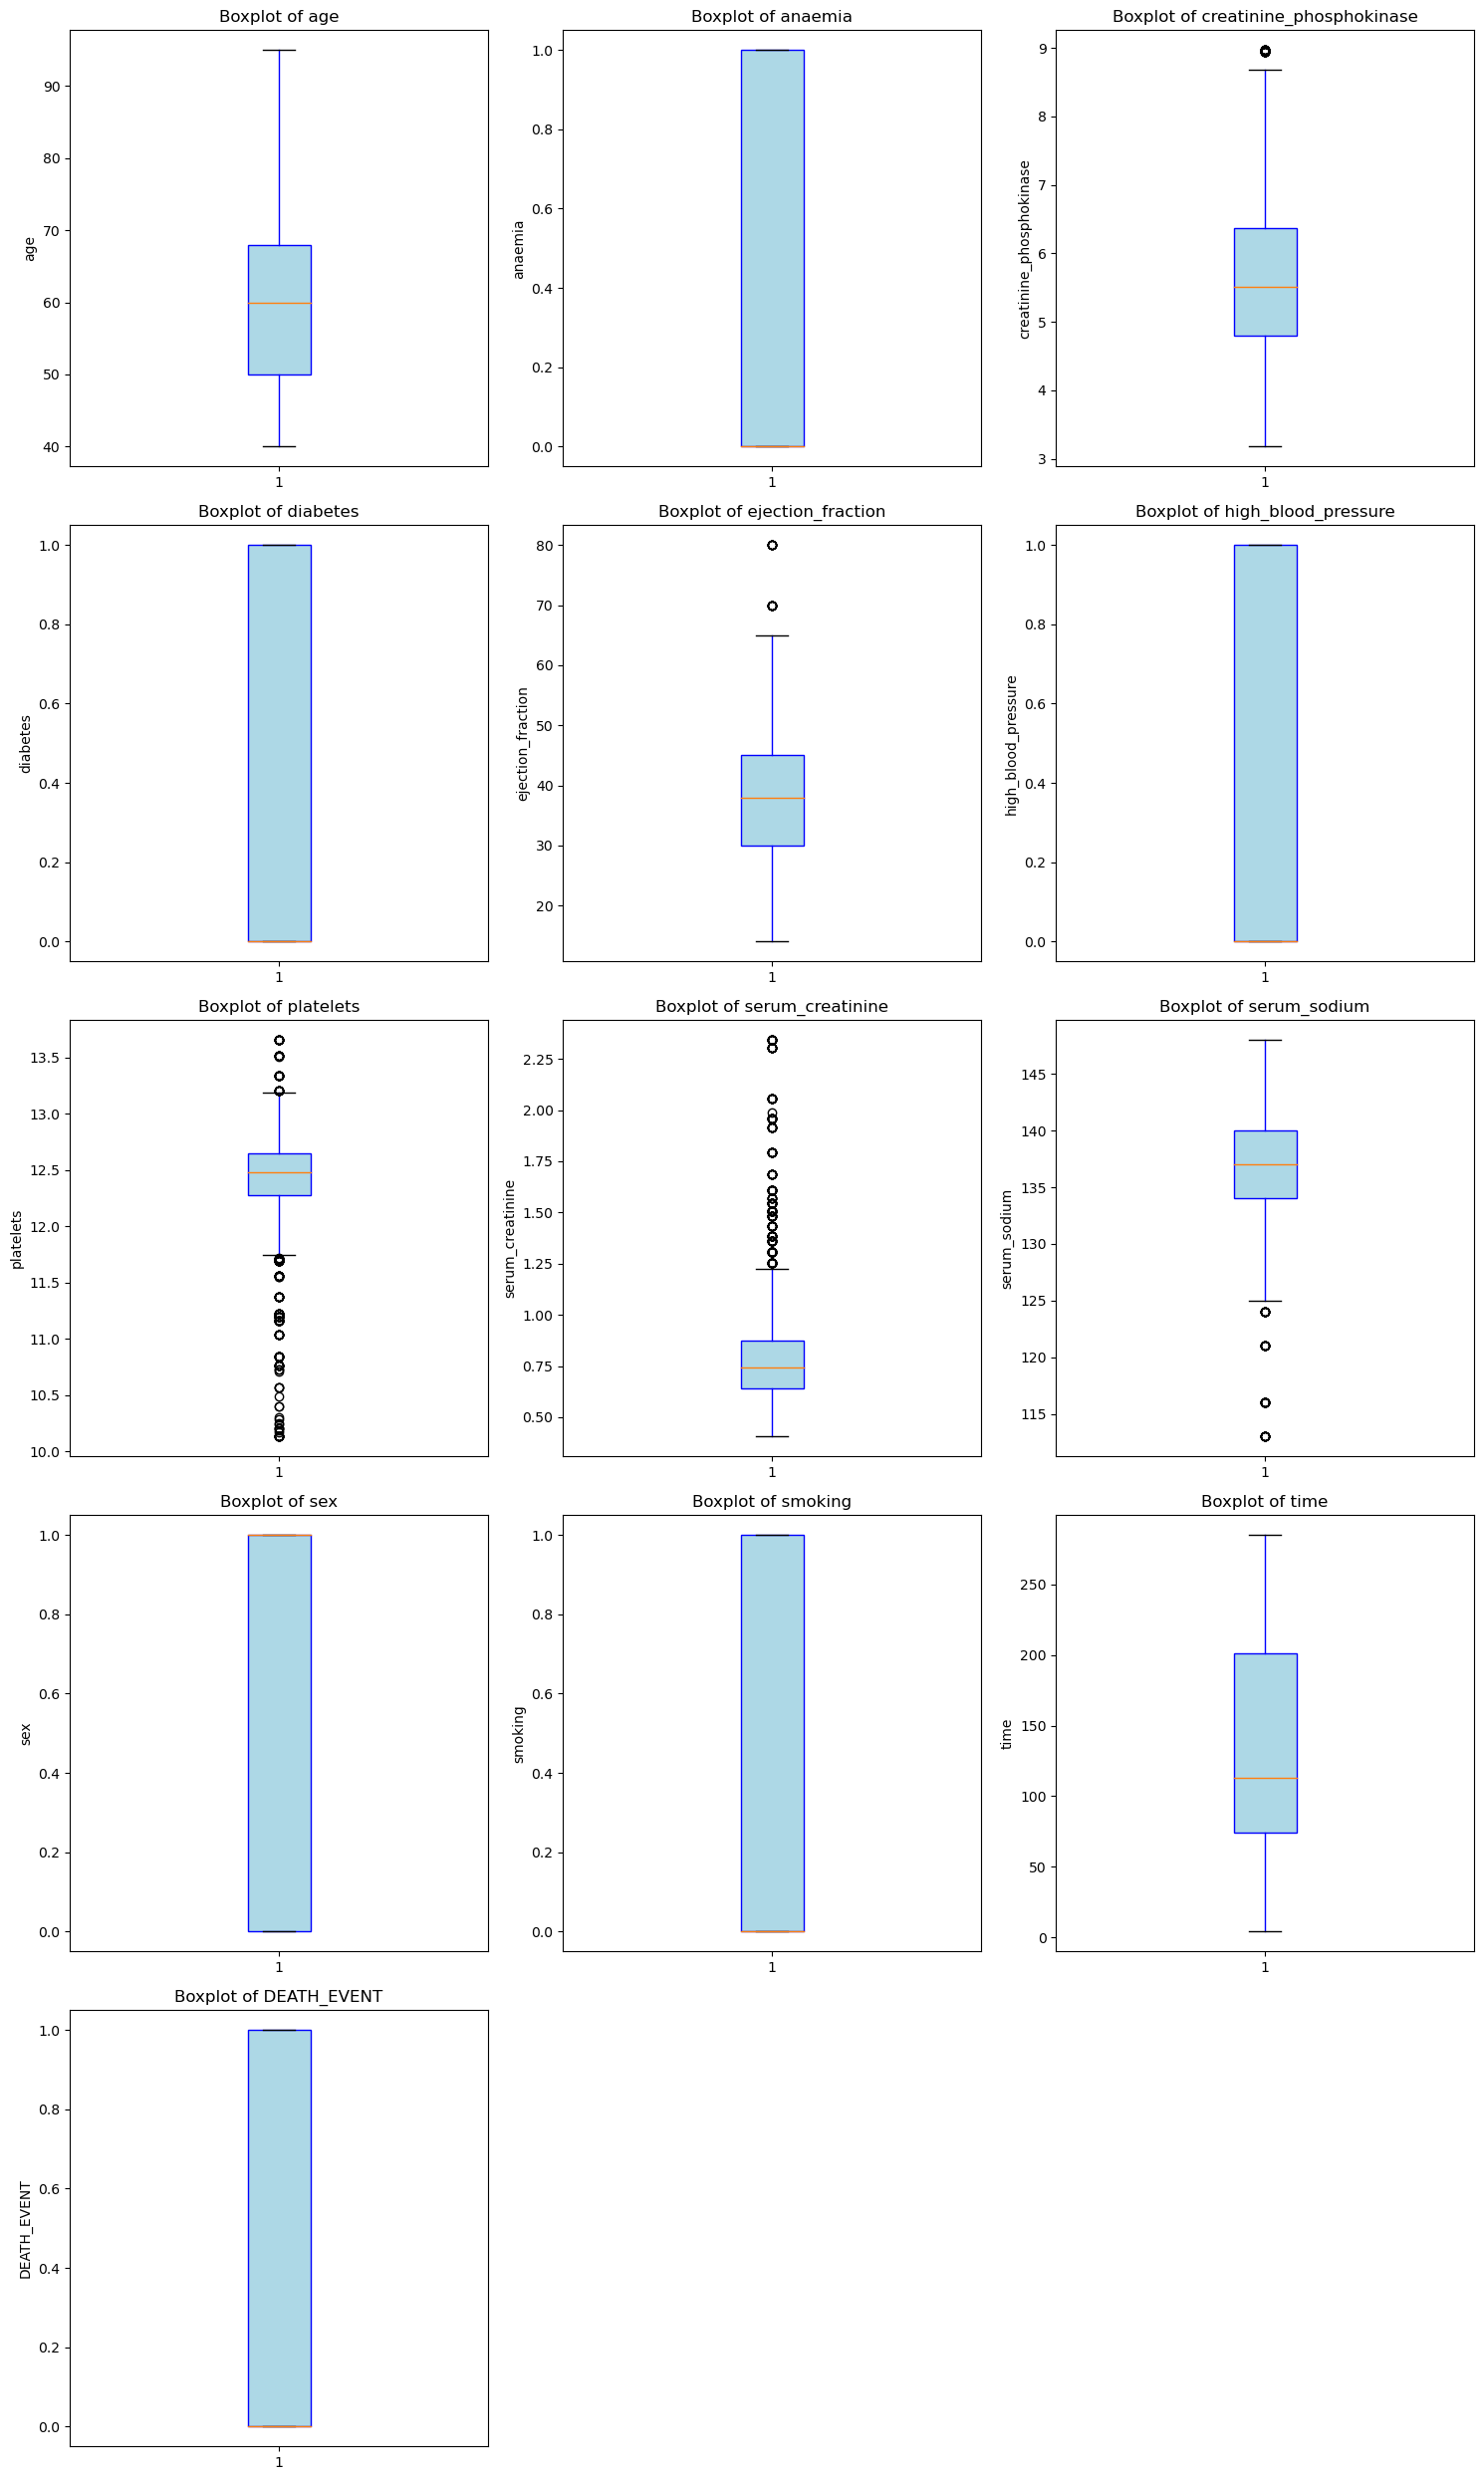

In [36]:
numerical_columns = df.select_dtypes(include=['number']).columns

num_columns = len(numerical_columns)
rows = (num_columns // 3) + (1 if num_columns % 3 != 0 else 0)

plt.figure(figsize=(15, 5 * rows))

for i, col in enumerate(numerical_columns, start=1):
    plt.subplot(rows, 3, i)  
    plt.boxplot(df[col].dropna(), patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'), whiskerprops=dict(color='blue'))
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [40]:
numerical_columns = df.select_dtypes(include=['number']).columns

outlier_percentages = {}

for col in numerical_columns:
    data = df[col].dropna() 
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data < lower_bound) | (data > upper_bound)]

    outlier_percentage = (len(outliers) / len(data)) * 100

    outlier_percentages[col] = outlier_percentage

for col, percentage in outlier_percentages.items():
    print(f"Column '{col}': {percentage:.2f}% outliers")

Column 'age': 0.00% outliers
Column 'anaemia': 0.00% outliers
Column 'creatinine_phosphokinase': 0.00% outliers
Column 'diabetes': 0.00% outliers
Column 'ejection_fraction': 0.00% outliers
Column 'high_blood_pressure': 0.00% outliers
Column 'platelets': 3.04% outliers
Column 'serum_creatinine': 6.19% outliers
Column 'serum_sodium': 0.00% outliers
Column 'sex': 0.00% outliers
Column 'smoking': 0.00% outliers
Column 'time': 0.00% outliers
Column 'DEATH_EVENT': 0.00% outliers


## Removing Outliers 

In [39]:
for col in df:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Shape before removing outliers:", df.shape)
print("Shape after removing outliers:", df.shape)


Shape before removing outliers: (4139, 13)
Shape after removing outliers: (4139, 13)


## Machine Learning (Applying Algorithums)

In [48]:
X = df.drop( 'DEATH_EVENT', axis=1)
y = df[ 'DEATH_EVENT']

In [42]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [49]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X)
scaled_features = min_max_scaler.transform(X)

In [50]:
scaled_features = pd.DataFrame(scaled_features,columns=df.columns[:-1])
scaled_features.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.272727,0.0,0.619847,0.0,0.60,0.0,0.511171,0.616671,0.529412,1.0,1.0,0.298932
1,0.090909,0.0,0.573635,1.0,0.46,0.0,0.644074,0.341037,0.705882,0.0,0.0,0.854093
2,1.000000,1.0,0.573635,0.0,0.30,0.0,0.899376,1.000000,0.235294,1.0,0.0,0.163701
3,0.545455,0.0,0.404473,1.0,0.30,0.0,0.606102,0.552541,0.235294,1.0,0.0,0.733096
4,0.418182,1.0,0.286641,1.0,0.90,0.0,0.215784,0.552541,1.000000,0.0,0.0,0.508897


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size = 0.20)

## K-Nearest Neighbour

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [55]:
knn = KNeighborsClassifier(n_neighbors=4)  

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9794685990338164

Confusion Matrix:
[[609   4]
 [ 13 202]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       613
           1       0.98      0.94      0.96       215

    accuracy                           0.98       828
   macro avg       0.98      0.97      0.97       828
weighted avg       0.98      0.98      0.98       828



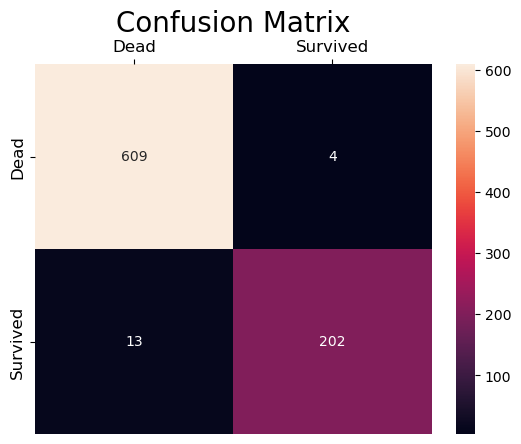

In [56]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, ax = ax, fmt = 'g');
ax.set_title('Confusion Matrix', fontsize=20)
ax.xaxis.set_ticklabels(['Dead', 'Survived'], fontsize = 12)
ax.xaxis.tick_top()

ax.yaxis.set_ticklabels(['Dead', 'Survived'], fontsize = 12)
plt.show()

## Decision Tree Algorithum 

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score

In [58]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9915458937198067

Confusion Matrix:
[[608   5]
 [  2 213]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       613
           1       0.98      0.99      0.98       215

    accuracy                           0.99       828
   macro avg       0.99      0.99      0.99       828
weighted avg       0.99      0.99      0.99       828



## Support Vector Machine 

In [59]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [60]:
svm = SVC(kernel='linear', random_state=42)

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8611111111111112

Confusion Matrix:
[[564  49]
 [ 66 149]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       613
           1       0.75      0.69      0.72       215

    accuracy                           0.86       828
   macro avg       0.82      0.81      0.81       828
weighted avg       0.86      0.86      0.86       828



## All Algorithums By Accuracy Score 

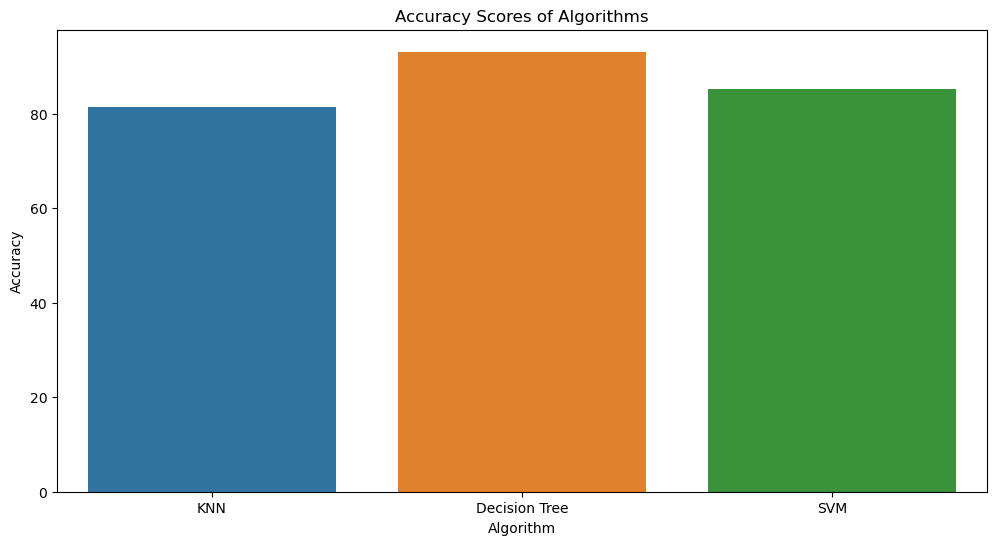

In [61]:
accuracy_scores = {
    'KNN': 0.8156*100,
    'Decision Tree': 0.9317*100,
    'SVM': 0.8532*100
}
accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Algorithm', 'Accuracy'])
plt.figure(figsize=(12, 6))
sns.barplot(x='Algorithm', y='Accuracy', data=accuracy_df)
plt.title("Accuracy Scores of Algorithms")
plt.show()